In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# load data from csv 
df = pd.read_csv("Cleaned_Crime_Data-2.csv")  

In [4]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON,Year,Month,Crime Code Desc,Weapon Code Desc,Premises Code Desc
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,2020,3,STOLEN PROPERTY,Unknown,Public Area
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,2020,2,BURGLARY,Unknown,Other
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,2020,11,STOLEN PROPERTY,Unknown,Residential
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,2020,3,OTHER CRIME,Unknown,Commercial
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,630,Hollenbeck,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,200 E AVENUE 28,34.0820,-118.2130,2020,9,STOLEN PROPERTY,Unknown,Public Area


# Basic EDA

In [6]:
# Fill missing values (Example)
df['Weapon Desc'].fillna('UNKNOWN', inplace=True)
df['Vict Sex'].fillna('U', inplace=True)  # U means Unknown
df['Vict Descent'].fillna('Unknown', inplace=True)


In [7]:
print("Duplicate Rows: ", df.duplicated().sum())


Duplicate Rows:  0


In [8]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)  # to maintain 4 -digit format


# Overall Crime Trend (Yearly Analysis)

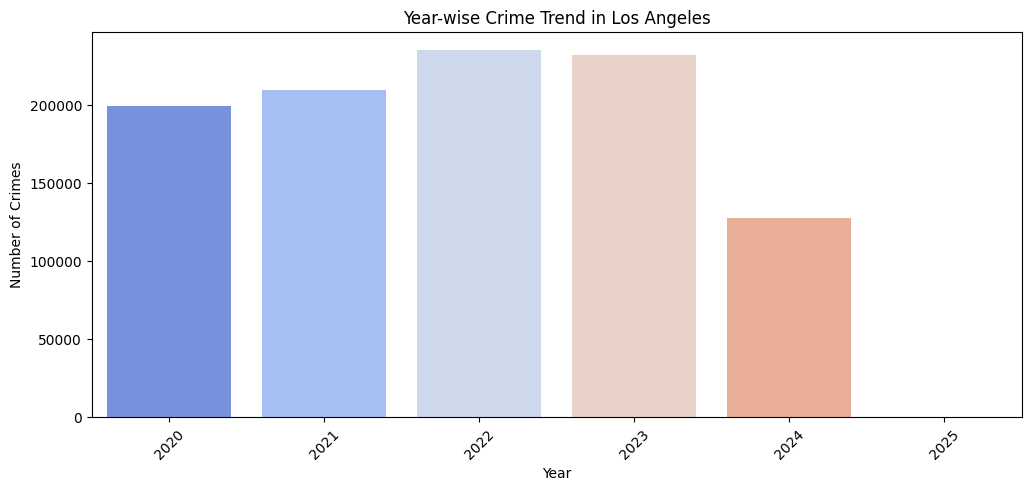

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from DATE OCC
df['Year'] = df['DATE OCC'].dt.year

# Plot yearly trend
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Year', palette='coolwarm', order=sorted(df['Year'].unique()))
plt.xticks(rotation=45)
plt.title('Year-wise Crime Trend in Los Angeles')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


# Monthly Crime Pattern

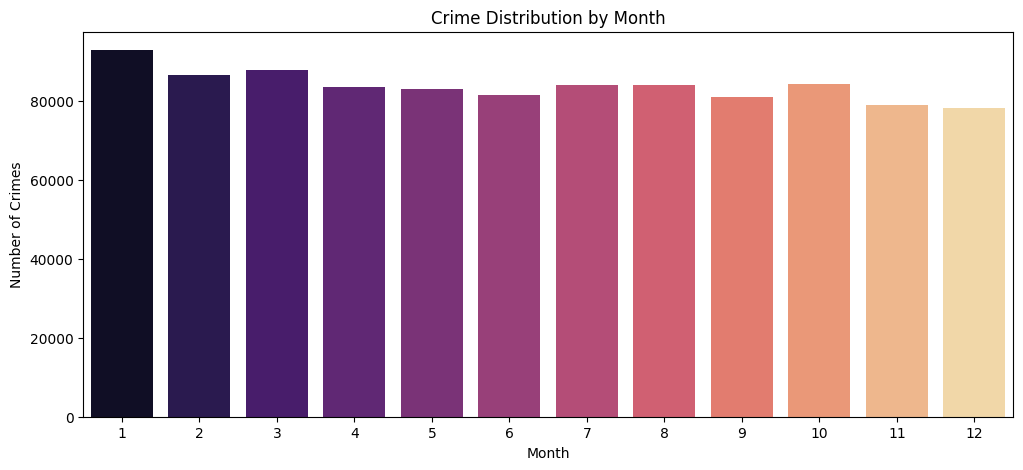

In [10]:
df['Month'] = df['DATE OCC'].dt.month

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Month', palette='magma')
plt.xticks(range(0, 12))
plt.title('Crime Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()


# Most Common Crime Types (Top 10 Crime Categories)

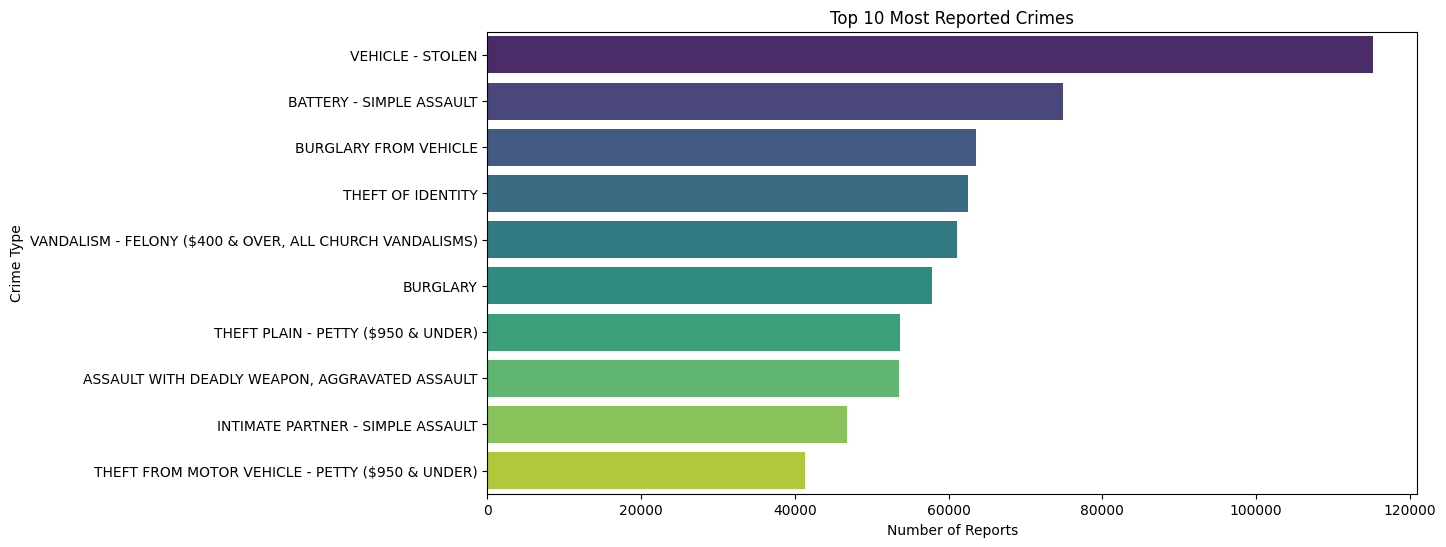

In [11]:
plt.figure(figsize=(12, 6))
top_crimes = df['Crm Cd Desc'].value_counts().head(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')
plt.title('Top 10 Most Reported Crimes')
plt.xlabel('Number of Reports')
plt.ylabel('Crime Type')
plt.show()


# Crime Count by Time Block

In [12]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv("Cleaned_Crime_Data-2.csv")  # Uncomment if loading from CSV

# Convert TIME OCC into Time Block
def get_time_block(time):
    if pd.isna(time):
        return "Unknown"
    time = int(time)  # Ensure it's an integer
    if 0 <= time < 600:
        return "Midnight - 6 AM"
    elif 600 <= time < 1200:
        return "Morning (6 AM - 12 PM)"
    elif 1200 <= time < 1800:
        return "Afternoon (12 PM - 6 PM)"
    else:
        return "Evening (6 PM - Midnight)"

df["Time Block"] = df["TIME OCC"].apply(get_time_block)

# Aggregate data for visualization
df_grouped = df.groupby(["Time Block", "Crime Code Desc"]).size().reset_index(name="Count")

# Define colors
crime_colors = {
    "ASSAULT": "blue",
    "BURGLARY": "lightblue",
    "HOMICIDE": "red",
    "ROBBERY": "orange",
    "SEX OFFENSE": "pink",
    "THEFT": "green",
    "VANDALISM": "purple",
    "VEHICLE THEFT": "brown",
    "WEAPON OFFENSE": "gray"
}

# Create bar plot
fig = px.bar(df_grouped, x="Time Block", y="Count", color="Crime Code Desc",
             color_discrete_map=crime_colors,
             title="Crime Count by Time Block and Crime Code Description")

fig.update_layout(legend_title="Crime Code Description")
fig.show()


# Crime Distribution by Area (Top 10 Areas)

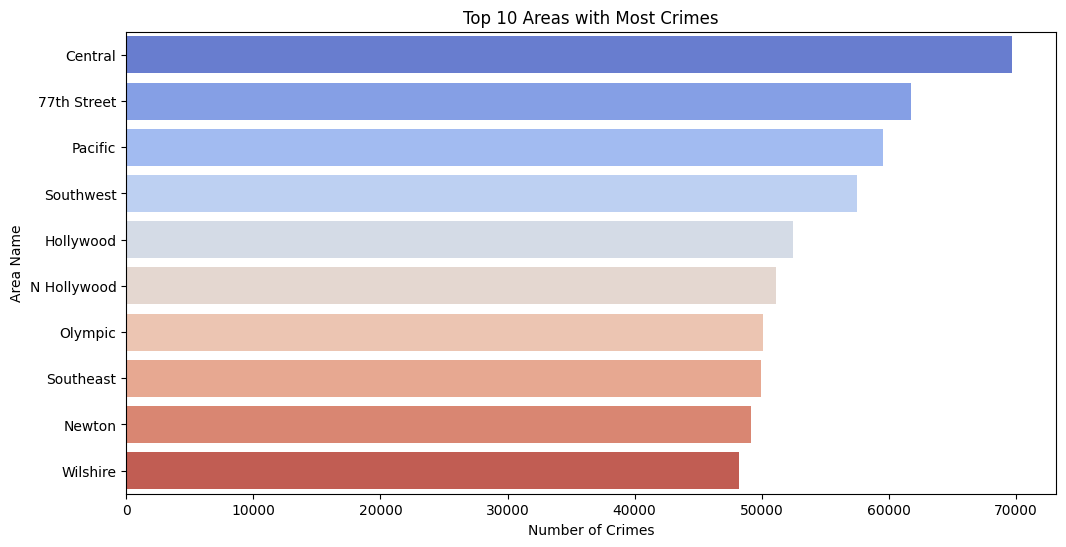

In [13]:
plt.figure(figsize=(12, 6))
top_areas = df['AREA NAME'].value_counts().head(10)
sns.barplot(x=top_areas.values, y=top_areas.index, palette='coolwarm')
plt.title('Top 10 Areas with Most Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.show()


# Heatmap of Crime Trends Over The Years (Top 6 Crimes)

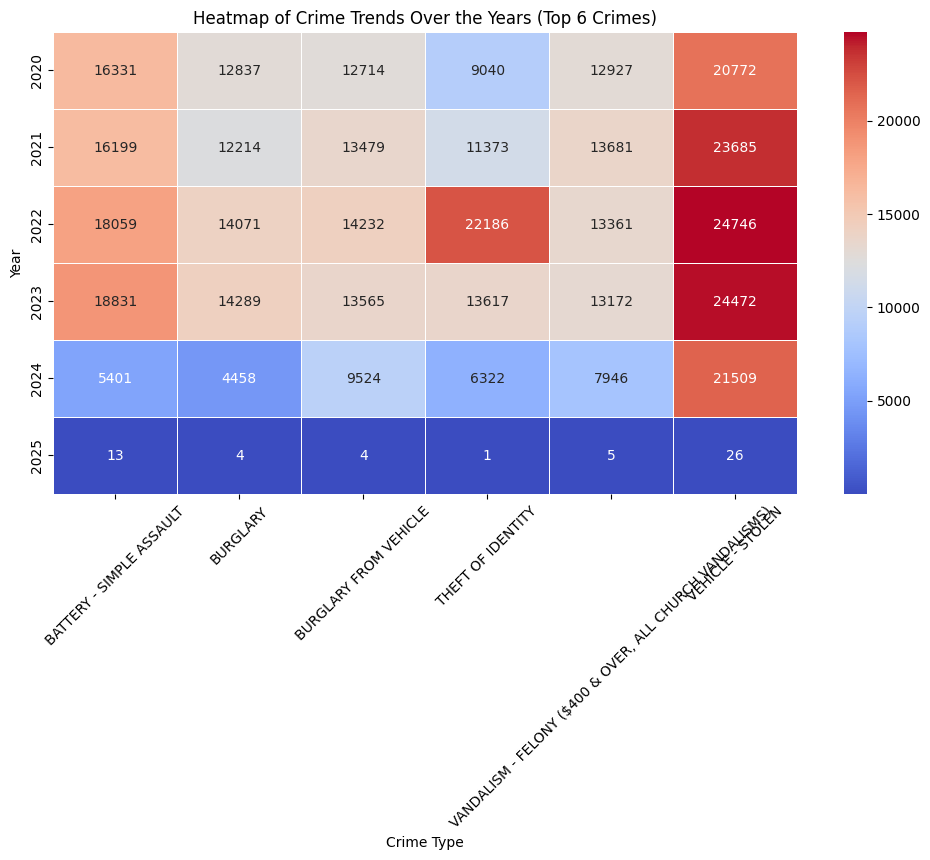

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identify top crimes
top_crimes = df['Crm Cd Desc'].value_counts().head(6).index

# 2. Filter dataset to only those crimes
subset_df = df[df['Crm Cd Desc'].isin(top_crimes)]

# 3. Group data by Year & Crime Type
crime_heatmap = subset_df.groupby(['Year', 'Crm Cd Desc']).size().unstack().fillna(0)

# 4. Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crime_heatmap,
            cmap='coolwarm',
            annot=True,
            fmt='.0f',
            linewidths=0.5)

plt.title('Heatmap of Crime Trends Over the Years (Top 6 Crimes)')
plt.xlabel('Crime Type')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.show()


# Using External Data (Real Data)

In [15]:
unemployment = pd.read_csv("CALOSA7URN.csv")  # Download real data
print(unemployment.head())
unemployment['observation_date'] = pd.to_datetime(unemployment['observation_date'])


  observation_date  CALOSA7URN
0       2019-12-01         4.2
1       2020-01-01         4.9
2       2020-02-01         4.8
3       2020-03-01         6.7
4       2020-04-01        16.8


In [16]:
# Aggregate crime count per year
unemployment['Year'] = unemployment['observation_date'].dt.year
crime_by_year = df.groupby("Year")["DR_NO"].count().reset_index()
crime_by_year.rename(columns={"DR_NO": "Total Crimes"}, inplace=True)

# Merge with unemployment data
crime_trends = crime_by_year.merge(unemployment, on="Year", how="left")

# Check data after merging
print(crime_trends.head())


   Year  Total Crimes observation_date  CALOSA7URN
0  2020        199847       2020-01-01         4.9
1  2020        199847       2020-02-01         4.8
2  2020        199847       2020-03-01         6.7
3  2020        199847       2020-04-01        16.8
4  2020        199847       2020-05-01        18.9


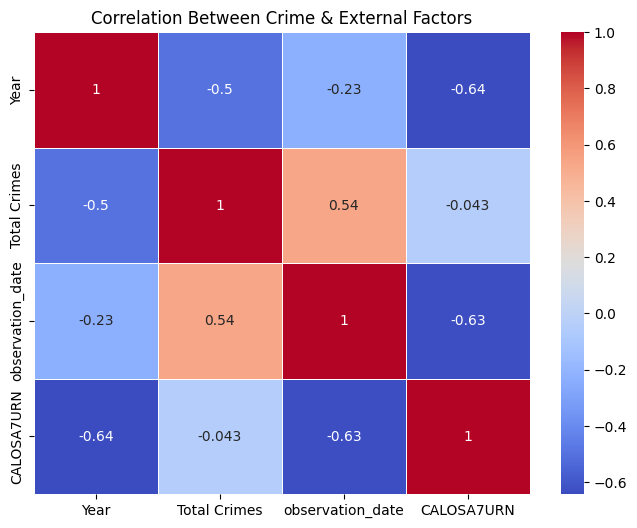

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
correlation_matrix = crime_trends.corr()

# Plot Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Crime & External Factors")
plt.show()


# Crime Distribution by Month

In [18]:
import plotly.express as px
import pandas as pd

monthly_trend = df.groupby(['Year','Month']).size().reset_index(name='Crime Count')
fig = px.line(monthly_trend, x='Month', y='Crime Count', color='Year', title='Interactive Monthly Crime Trend')
fig.show()
